In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import keras
from keras.layers import Dense
import joblib
import datetime
import time
import warnings

In [56]:
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('train.csv')

In [58]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [59]:
df.shape

(14999, 9)

In [60]:
df.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [61]:
df = df.drop(['vidid'], axis=1)


In [62]:
df['adview'].max()

5429665

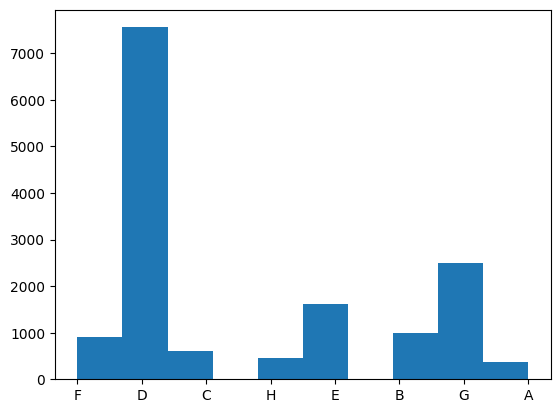

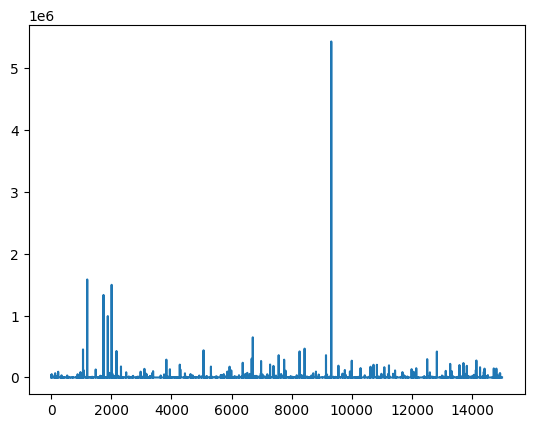

In [63]:
plt.hist(df['category'])
plt.show()
plt.plot(df['adview'])
plt.show()

In [64]:
df = df[df['adview'] <  2000000]

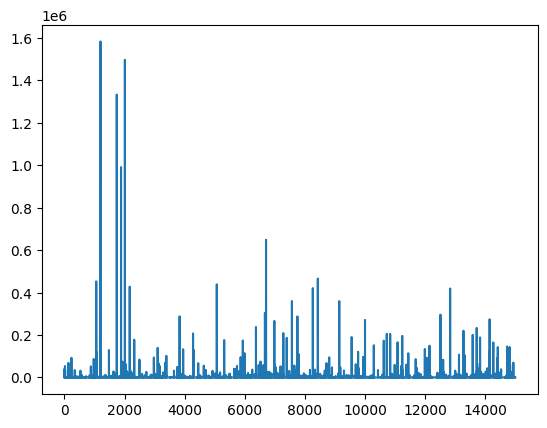

In [65]:
plt.plot(df['adview'])
plt.show()

In [66]:
df = df[df['views'] != 'F']
df = df[df['likes'] != 'F']
df = df[df['dislikes'] != 'F']
df = df[df['comment'] != 'F']

In [67]:
df['views'] = pd.to_numeric(df['views'])
df['likes'] = pd.to_numeric(df['likes'])
df['dislikes'] = pd.to_numeric(df['dislikes'])
df['comment'] = pd.to_numeric(df['comment'])
df['adview'] = pd.to_numeric(df['adview'])

In [68]:
df.dtypes

adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category     object
dtype: object

In [69]:
df.shape

(14636, 8)

In [70]:
df['category'].unique()

array(['F', 'D', 'C', 'H', 'E', 'B', 'G', 'A'], dtype=object)

In [71]:
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
df['category'] = df['category'].map(category)

In [72]:
label_encoder = LabelEncoder()
df['duration'] = label_encoder.fit_transform(df['duration'])
df['published'] = label_encoder.fit_transform(df['published'])
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2168,2925,6
1,2,1707,56,2,6,2185,3040,4
2,1,2023,25,0,2,2094,1863,3
3,6,620860,777,161,153,2119,2546,8
4,1,666,1,0,0,2091,1963,4


In [73]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
        if(h==''):
            h = '00'
        if(m == ''):
            m = '00'
        if(s==''):
            s='00'
            
    bp = h+':'+m+':'+s
    return bp

In [74]:
md = pd.read_csv('train.csv')['duration']
time = md.apply(checki)

In [75]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [76]:
time1 = time.apply(func_sec)

In [77]:
df['duration'] = time1
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2168,457,6
1,2,1707,56,2,6,2185,570,4
2,1,2023,25,0,2,2094,136,3
3,6,620860,777,161,153,2119,262,8
4,1,666,1,0,0,2091,31,4


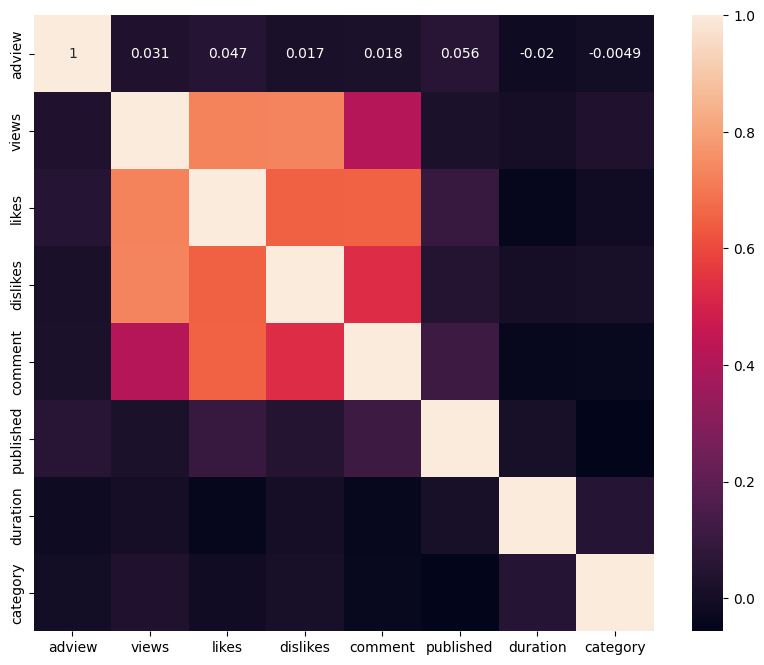

In [78]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()



In [79]:
corr

,adview,views,likes,dislikes,comment,published,duration,category
adview,1.000000,0.031177,0.046541,0.016686,0.017631,0.055657,-0.019592,-0.004910
views,0.031177,1.000000,0.726599,0.730216,0.410597,0.020110,0.002563,0.032822
likes,0.046541,0.726599,1.000000,0.648631,0.651215,0.096941,-0.042518,-0.009175
dislikes,0.016686,0.730216,0.648631,1.000000,0.532588,0.043745,0.001587,0.011355
comment,0.017631,0.410597,0.651215,0.532588,1.000000,0.114253,-0.037478,-0.034107
published,0.055657,0.020110,0.096941,0.043745,0.114253,1.000000,0.011976,-0.056814
duration,-0.019592,0.002563,-0.042518,0.001587,-0.037478,0.011976,1.000000,0.049235
category,-0.004910,0.032822,-0.009175,0.011355,-0.034107,-0.056814,0.049235,1.000000


In [80]:
df = df.drop(['category'], axis=1)

In [81]:
min_max_scaler = MinMaxScaler()
df1 = df
md = min_max_scaler.fit(df1.iloc[1 : ])
scaled_data = md.transform(df1.iloc[1 : ])
df1 = pd.DataFrame(scaled_data)

In [82]:
cols = list(df.columns)
for i in range(0, 7):
    df1.rename(columns={i : cols[i]}, inplace=True)
df1.head()

,adview,views,likes,dislikes,comment,published,duration
0,6.313749e-07,1.201033e-05,0.000197,0.000040,0.000080,0.916911,0.013470
1,0.000000e+00,1.429939e-05,0.000088,0.000000,0.000027,0.878724,0.003214
2,3.156875e-06,4.497072e-03,0.002738,0.003256,0.002039,0.889215,0.006191
3,0.000000e+00,4.469466e-06,0.000004,0.000000,0.000000,0.877465,0.000733
4,1.894125e-06,2.100721e-07,0.000000,0.000000,0.000000,0.856064,0.000354


In [83]:
x = df1.drop(['adview'], axis=1)
y = df1['adview']

In [84]:
x.shape, y.shape

((14635, 6), (14635,))

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [86]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11708, 6), (2927, 6), (11708,), (2927,))

In [87]:
def print_error(x_test, y_test, model_name):
    preds = model_name.predict(x_test)
    print("Mean Squared Error =", mean_squared_error(y_test, preds))
    print("Mean Absolute Error =", mean_absolute_error(y_test, preds))
    print("Root Mean Squared Error =", np.sqrt(mean_squared_error(y_test, preds)))


In [88]:
linear_model = LinearRegression()
svr_model = SVR()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()

In [89]:
linear_model.fit(x_train, y_train)
svr_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor()

In [90]:
print("Linear Regressor :")
print_error(x_test, y_test, linear_model)
print("---------------------------------")
print("Support Vector Regressor :")
print_error(x_test, y_test, svr_model)
print("---------------------------------")
print("Decision Tree Regressor :")
print_error(x_test, y_test, decision_tree_model)
print("---------------------------------")
print("Random Forest Regressor :")
print_error(x_test, y_test, random_forest_model)

Linear Regressor :
Mean Squared Error = 0.0004090128956241905
Mean Absolute Error = 0.0023822528493513857
Root Mean Squared Error = 0.0202240672374325
---------------------------------
Support Vector Regressor :
Mean Squared Error = 0.009347221463992684
Mean Absolute Error = 0.09544448257762955
Root Mean Squared Error = 0.09668102949386029
---------------------------------
Decision Tree Regressor :
Mean Squared Error = 0.000616774832267789
Mean Absolute Error = 0.002035694009586111
Root Mean Squared Error = 0.02483495182737001
---------------------------------
Random Forest Regressor :
Mean Squared Error = 0.00038806980695768416
Mean Absolute Error = 0.0018676418569655983
Root Mean Squared Error = 0.019699487479568706


In [91]:
ann = keras.models.Sequential([
    Dense(6, activation='relu', input_shape=x_train.shape[1 :]),
    Dense(6, activation='relu'),
    Dense(1)
])
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])

In [92]:
history = ann.fit(x_train, y_train, epochs=100)

Epoch 1/100


366/366 [==============================] - 2s 2ms/step - loss: 5.3560e-04 - mean_squared_error: 5.3560e-04
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 2.9714e-04 - mean_squared_error: 2.9714e-04
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 2.9203e-04 - mean_squared_error: 2.9203e-04
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 2.8907e-04 - mean_squared_error: 2.8907e-04
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 2.8779e-04 - mean_squared_error: 2.8779e-04
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 2.8736e-04 - mean_squared_error: 2.8736e-04
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 2.8771e-04 - mean_squared_error: 2.8771e-04
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 2.8720e-04 - mean_squared_error: 2.8720e-04
Epoch 9/100
366/366 [=========================

In [93]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
print("ANN :")
print_error(x_test, y_test, ann)

ANN :


92/92 [==============================] - 0s 1ms/step
Mean Squared Error = 0.00040434147286010585
Mean Absolute Error = 0.002121904452399675
Root Mean Squared Error = 0.020108243902939558


In [95]:
joblib.dump(linear_model, "Models/linear_model_youtubeadview.pkl")
joblib.dump(svr_model, "Models/svr_model_youtubeadview.pkl")
joblib.dump(decision_tree_model, "Models/decision_tree_model_youtubeadview.pkl")
joblib.dump(random_forest_model, "Models/random_forest_model_youtubeadview.pkl")

ann.save("Models/ann_youtubeadview.h5")